In [1]:
import csv
import random
import pandas as pd
from sklearn.metrics import r2_score
from datetime import datetime
import numpy as np

import sklearn
import matplotlib.pyplot as plt



In [2]:
# Mendefinisikan kelas individu
class Individual:
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = 0

    def evaluate_fitness(self, data):
        correct_predictions = 0
        for x, y, label in data:
            prediction = self.predict(x)
            if prediction == label:
                correct_predictions += 1
        self.fitness = correct_predictions / len(data)

    def predict(self, x):
        slope, intercept = self.chromosome
        line_value = slope * x + intercept
        if line_value >= 0:
            return 1
        else:
            return 0

    def crossover(self, other):
        new_chromosome = []
        for i in range(len(self.chromosome)):
            if random.random() < 0.9:
                new_chromosome.append(self.chromosome[i])
            else:
                new_chromosome.append(other.chromosome[i])
        return Individual(new_chromosome)

    def mutate(self, mutation_rate):
        for i in range(len(self.chromosome)):
            if random.random() < mutation_rate:
                self.chromosome[i] += random.uniform(-0.1, 0.1)



In [3]:
# Mendefinisikan populasi awal
def create_initial_population(population_size):
    population = []
    for _ in range(population_size):
        chromosome = [random.uniform(-1, 1), random.uniform(-1, 1)]
        individual = Individual(chromosome)
        population.append(individual)
    return population


In [4]:

# Menggunakan algoritma genetika untuk evolusi populasi
def genetic_algorithm(data, population_size, mutation_rate, num_generations):
    population = create_initial_population(population_size)
    for generation in range(num_generations):
        # Evaluasi fitness individu dalam populasi
        for individual in population:
            individual.evaluate_fitness(data)

        # Mengurutkan populasi berdasarkan fitness
        population.sort(key=lambda x: x.fitness, reverse=True)

        # Menampilkan individu terbaik di setiap generasi
        best_individual = population[0]
        print("Generasi:", generation, " Fitness Terbaik:", best_individual.fitness)

        # Membuat populasi baru melalui seleksi, crossover, dan mutasi
        new_population = [best_individual]
        while len(new_population) < population_size:
            parent1 = random.choice(population[:int(population_size/2)])
            parent2 = random.choice(population[:int(population_size/2)])
            child = parent1.crossover(parent2)
            child.mutate(mutation_rate)
            new_population.append(child)

        population = new_population

    return population[0]


In [5]:

# Membaca data dari file CSV
def read_data_from_csv(file_path):
    data = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  
        for row in reader:
            x = float(row[0])
            y = float(row[1])
            label = int(row[2])
            data.append((x, y, label))
    return data



In [12]:
# Fungsi untuk memvisualisasikan data dan model
def visualize_data(data, best_individual):
    plt.figure(figsize=(4, 3))
    for x, y, label in data:
        plt.plot(x, y, 'ro' if label == 1 else 'bo')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Genetic Algorithm - Data dan Model')
    
    # Menampilkan model terbaik sebagai garis
    x_values = np.linspace(min([x for x, _, _ in data]), max([x for x, _, _ in data]), 100)
    y_values = [best_individual.predict(x) for x in x_values]
    plt.plot(x_values, y_values, 'g-', linewidth=2.0)
    
    plt.show()



In [7]:
file_path = 'DataClassification.csv'  # Ubah dengan path file CSV yang sesuai
data = read_data_from_csv(file_path)


In [8]:
population_size = 10
mutation_rate = 0.2
num_generations = 100



In [9]:
best_individual = genetic_algorithm(data, population_size, mutation_rate, num_generations)

# Mendapatkan koefisien garis terbaik dari kromosom individu terbaik
slope, intercept = best_individual.chromosome

# Menampilkan persamaan garis
equation = f'y = {slope} * x + {intercept}'
print("Persamaan garis:", equation)

Generasi: 0  Fitness Terbaik: 0.5
Generasi: 1  Fitness Terbaik: 0.5
Generasi: 2  Fitness Terbaik: 0.5
Generasi: 3  Fitness Terbaik: 0.5
Generasi: 4  Fitness Terbaik: 0.5
Generasi: 5  Fitness Terbaik: 0.5
Generasi: 6  Fitness Terbaik: 0.5
Generasi: 7  Fitness Terbaik: 0.5
Generasi: 8  Fitness Terbaik: 0.5
Generasi: 9  Fitness Terbaik: 0.5
Generasi: 10  Fitness Terbaik: 0.5
Generasi: 11  Fitness Terbaik: 0.5
Generasi: 12  Fitness Terbaik: 0.5
Generasi: 13  Fitness Terbaik: 0.5
Generasi: 14  Fitness Terbaik: 0.5
Generasi: 15  Fitness Terbaik: 0.5
Generasi: 16  Fitness Terbaik: 0.5
Generasi: 17  Fitness Terbaik: 0.5
Generasi: 18  Fitness Terbaik: 0.5
Generasi: 19  Fitness Terbaik: 0.5
Generasi: 20  Fitness Terbaik: 0.5
Generasi: 21  Fitness Terbaik: 0.5
Generasi: 22  Fitness Terbaik: 0.5
Generasi: 23  Fitness Terbaik: 0.5
Generasi: 24  Fitness Terbaik: 0.5
Generasi: 25  Fitness Terbaik: 0.5
Generasi: 26  Fitness Terbaik: 0.5
Generasi: 27  Fitness Terbaik: 0.5
Generasi: 28  Fitness Terbaik:

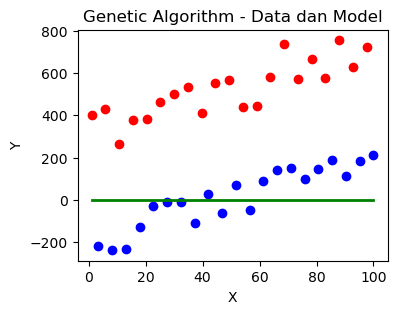

In [13]:
visualize_data(data, best_individual)

In [11]:
def calculate_rmse(predictions, labels):
    squared_errors = [(p - l) ** 2 for p, l in zip(predictions, labels)]
    mean_squared_error = np.mean(squared_errors)
    rmse = np.sqrt(mean_squared_error)
    return rmse

def calculate_mse(predictions, labels):
    squared_errors = [(p - l) ** 2 for p, l in zip(predictions, labels)]
    mean_squared_error = np.mean(squared_errors)
    return mean_squared_error


x_values = [x for x, _, _ in data]
y_values = [y for _, y, _ in data]
labels = [label for _, _, label in data]
predictions = [best_individual.predict(x) for x in x_values]

rmse = calculate_rmse(predictions, labels)
mse = calculate_mse(predictions, labels)

print("RMSE:", rmse)
print("MSE:", mse)

RMSE: 0.7071067811865476
MSE: 0.5
